In [41]:
import pandas as pd
import pandas as pd
import tldextract
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import requests

In [2]:
benign_data = pd.read_csv('benign_domain_list.csv', names=['url'])
mal_data = pd.read_csv('Malicious_URLs.csv')
mixed_data = pd.read_csv('mixed_domain_list.csv', names=['url'])
tranco_rank_data = pd.read_csv("tranco_full_list_for_ranking.csv", names=['url'])
spamhaus_data=pd.read_csv('Spamhaus-tlds.csv')

In [46]:
def count_periods(url):
    return url.count('.')
def count_hyphens(url):
    return url.count('-')
def get_fqdn_length(url):
    extracted = tldextract.extract(url)
    return len(extracted.fqdn)
def count_percent_digits(url):
    num_digits = sum(c.isdigit() for c in url)
    percent = (num_digits / len(url)) * 100
    return '{:.2f}'.format(percent)
def check_redirects(df, column_name):
    """
    Function to check if a URL in a given column has any redirects.
    
    Parameters:
    - df: pandas DataFrame containing the URLs to check.
    - column_name: name of the column in `df` containing the URLs to check.
    
    Returns:
    - A list of booleans, where `True` indicates that the corresponding URL in `column_name` had a redirect,
      and `False` indicates that it did not.
    """
    redirect_flags = []
    for url in df[column_name]:
        try:
            response = requests.get(url, allow_redirects=False)
            if response.status_code == 301 or response.status_code == 302:
                redirect_flags.append(True)
            else:
                redirect_flags.append(False)
        except:
            redirect_flags.append(False)
    return redirect_flags



In [47]:
benign_data['domain'] = benign_data['url'].apply(lambda x: tldextract.extract(x).domain)
benign_data['tld'] = mal_data['url'].apply(lambda x: tldextract.extract(x).suffix)
benign_data['FQDN length'] = benign_data['url'].apply(get_fqdn_length)
benign_data['FQDN digit percentage'] = benign_data['url'].apply(count_percent_digits)
benign_data['period count'] = benign_data['url'].apply(count_periods)
benign_data['hyphen count'] = benign_data['url'].apply(count_hyphens)
benign_data['domain_length'] = benign_data['domain'].apply(lambda x: len(x))
bins = [0, 5, 10, 15, float('inf')]
labels = ['1-5', '6-10', '11-15', '16+']
benign_data['domain_length_group'] = pd.cut(benign_data['FQDN length'], bins=bins, labels=labels)

redirect_flags = check_redirects(benign_data, 'url')
redirect_flags

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [48]:
remove = ['http://', 'ftp://','www.', 'https://']
for string in remove:
    mal_data['url'] = mal_data['url'].str.replace(string, '')
mal_data['url'] = mal_data['url'].str.split('/', expand=True).get(0)
mal_data['url'] = mal_data['url'].str.strip()
mal_data['subdomain'] = mal_data['url'].apply(lambda x: tldextract.extract(x).subdomain)
mal_data['domain'] = mal_data['url'].apply(lambda x: tldextract.extract(x).domain)
mal_data['domain_length'] = mal_data['domain'].apply(lambda x: len(x))
mal_data['tld'] = mal_data['url'].apply(lambda x: tldextract.extract(x).suffix)
mal_data['FQDN length'] = mal_data['url'].apply(get_fqdn_length)
mal_data['FQDN digit percentage'] = mal_data['url'].apply(count_percent_digits)
mal_data['hyphen count'] = mal_data['url'].apply(count_hyphens)
mal_data['period count'] = mal_data['url'].apply(count_periods)
bins = [0, 5, 10, 15, float('inf')]
labels = ['1-5', '6-10', '11-15', '16+']
mal_data['domain_length_group'] = pd.cut(mal_data['domain_length'], bins=bins, labels=labels)
#mal_data
redirect_flags = check_redirects(mal_data, 'url')
redirect_flags

C:\Users\Lucas\AppData\Local\Temp\ipykernel_29232\1743025886.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  mal_data['url'] = mal_data['url'].str.replace(string, '')


[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [40]:
mixed_data['subdomain'] = mixed_data['url'].apply(lambda x: tldextract.extract(x).subdomain)
mixed_data['domain'] = mixed_data['url'].apply(lambda x: tldextract.extract(x).domain)
mixed_data['tld'] = mixed_data['url'].apply(lambda x: tldextract.extract(x).suffix)
mixed_data['FQDN length'] = mixed_data['url'].apply(get_fqdn_length)
mixed_data['FQDN digit percentage'] = mixed_data['url'].apply(count_percent_digits)
mixed_data['period count'] = mixed_data['url'].apply(count_periods)
mixed_data['hyphen count'] = mixed_data['url'].apply(count_hyphens)
mixed_data['domain_length'] = mixed_data['domain'].apply(lambda x: len(x))
bins = [0, 5, 10, 15, float('inf')]
labels = ['1-5', '6-10', '11-15', '16+']
mixed_data['domain_length_group'] = pd.cut(mixed_data['domain_length'], bins=bins, labels=labels)

mixed_data

,url,subdomain,domain,tld,FQDN length,FQDN digit percentage,period count,domain_length,domain_length_group,hyphen count
0,goodrx.com,,goodrx,com,10,0.00,1,6,6-10,0
1,weather.com.cn,,weather,com.cn,14,0.00,2,7,6-10,0
2,draftkings.com,,draftkings,com,14,0.00,1,10,6-10,0
3,suntimes.com,,suntimes,com,12,0.00,1,8,6-10,0
4,moe.gov.cn,,moe,gov.cn,10,0.00,2,3,1-5,0
...,...,...,...,...,...,...,...,...,...,...
178,services.runescape.com-ul.cc,services.runescape,com-ul,cc,28,0.00,3,6,6-10,1
179,nsu-amazon.1inc.top,nsu-amazon,1inc,top,19,5.26,2,4,1-5,1
180,80fxv9.cn,,80fxv9,cn,9,33.33,1,6,6-10,0
181,nsu-amazon.3inc.top,nsu-amazon,3inc,top,19,5.26,2,4,1-5,1


In [7]:
tranco_rank_data['domain'] = tranco_rank_data['url'].apply(lambda x: tldextract.extract(x).domain)
tranco_rank_data['tld'] = tranco_rank_data['url'].apply(lambda x: tldextract.extract(x).suffix)
tranco_rank_data

,url,domain,tld
1,google.com,google,com
2,facebook.com,facebook,com
3,a-msedge.net,a-msedge,net
4,youtube.com,youtube,com
5,microsoft.com,microsoft,com
...,...,...,...
3648683,jeventanddesign.com,jeventanddesign,com
3648684,medi-verbund.de,medi-verbund,de
3648685,stjudemedical.net,stjudemedical,net
3648686,dsa-vorschau.de,dsa-vorschau,de


['com' 'org' 'no' 'pl' 'in' 'gov' 'cn' 'tv' 'cc' 'net' 'su' 'de' 'fr' 'ru'
 'us' 'se' 'io' 'be' 'gq' 'cyou' 'gal' 'vn' 'ca' 'eu' 'mobi' 'info' 'ch'
 'at' 'gallery' 'pt' 'me' 'co' 'buzz' 'top']


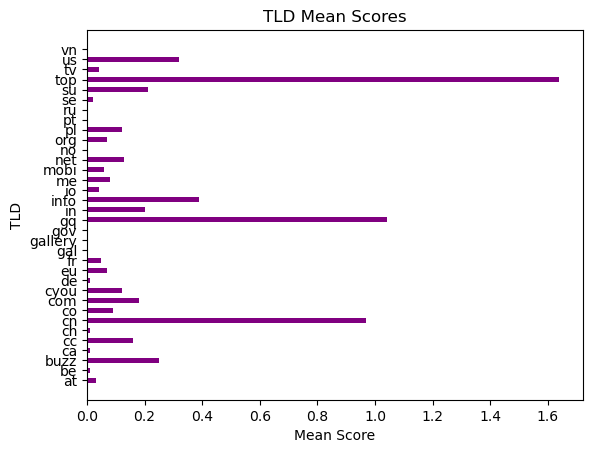

In [28]:
merged_data = pd.merge(mixed_data, spamhaus_data,on=('tld'),how='inner' )
data = merged_data['tld'].unique()
grouped_data = merged_data.groupby('tld')['score'].mean()
print(data)
plt.barh(grouped_data.index, grouped_data.values, height=0.5, color='purple')

plt.ylabel('TLD')
plt.xlabel('Mean Score')
plt.title('TLD Mean Scores')
plt.xticks(rotation=0)

# Show the graph
plt.show()

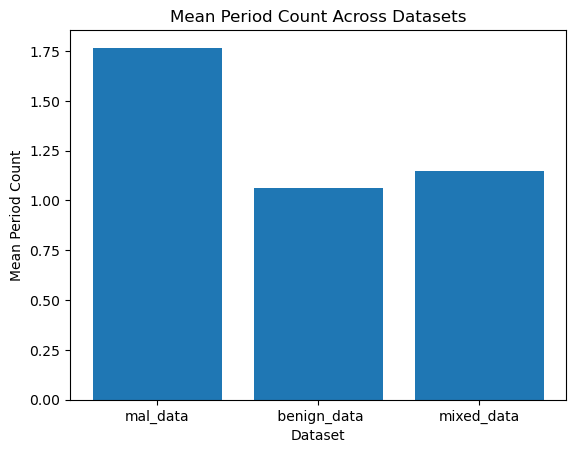

In [8]:


# Calculate the mean period count for each dataset
mean1 = mal_data['period count'].mean()
mean2 = benign_data['period count'].mean()
mean3 = mixed_data['period count'].mean()

# Create a bar graph with the dataset names on the x-axis and the mean period count on the y-axis
plt.bar(['mal_data', ' benign_data', 'mixed_data'], [mean1, mean2, mean3])

# Customize the graph labels and title
plt.xlabel('Dataset')
plt.ylabel('Mean Period Count')
plt.title('Mean Period Count Across Datasets')

# Show the graph
plt.show()

This shows that the average of the benign dataset is one so in the mixed dataset we should be looking for urls that have more than one decimal when serching for malicious urls in
mixed data

In [9]:
greater_than_one = mixed_data[mixed_data['period count'] > 1]
greater_than_one

,url,subdomain,domain,tld,FQDN length,FQDN digit percentage,period count,domain_length,domain_length_group
1,weather.com.cn,,weather,com.cn,14,0.00,2,7,6-10
4,moe.gov.cn,,moe,gov.cn,10,0.00,2,3,1-5
7,dnsv1.com.cn,,dnsv1,com.cn,12,8.33,2,5,1-5
49,kinghost.com.br,,kinghost,com.br,15,0.00,2,8,6-10
57,awsdns-31.co.uk,,awsdns-31,co.uk,15,13.33,2,9,6-10
64,webconect.cloud.interhostsolutions.be,webconect.cloud,interhostsolutions,be,37,0.00,3,18,16+
67,amozocojprys.myvnc.com,amozocojprys,myvnc,com,22,0.00,2,5,1-5
69,smbc-card.com-mem-index.s5jif0.cn,smbc-card.com-mem-index,s5jif0,cn,33,6.06,3,6,6-10
70,informationservice.inamazonjoining.cyou,informationservice,inamazonjoining,cyou,39,0.00,2,15,11-15
71,www.anabolic-online.com,www,anabolic-online,com,23,0.00,2,15,11-15


In [10]:
benign_tld_counts = benign_data.groupby('tld').size().reset_index(name='count')
benign_tld_counts = benign_tld_counts[(benign_tld_counts['tld'].str.strip() != '')]
benign_top_tlds = benign_tld_counts.sort_values('count', ascending=False).head(10)
benign_top_tlds['rank'] = range(1, len(benign_top_tlds) + 1)
benign_top_tlds = benign_top_tlds[['rank', 'tld', 'count']]
benign_top_tlds

,rank,tld,count
47,1,com,1982
163,2,ru,357
144,3,org,204
135,4,net,157
201,5,xyz,105
124,6,me,94
37,7,co,88
25,8,ca,84
121,9,ly,80
185,10,top,79


In [11]:
mal_tld_counts = mal_data.groupby('tld').size().reset_index(name='count')
mal_tld_counts = mal_tld_counts[(mal_tld_counts['tld'].str.strip() != '')]
mal_top_tlds = mal_tld_counts.sort_values('count', ascending=False).head(10)
mal_top_tlds['rank'] = range(1, len(mal_top_tlds) + 1)
mal_top_tlds = mal_top_tlds[['rank', 'tld', 'count']]
mal_top_tlds

,rank,tld,count
59,1,com,5105
223,2,ru,570
187,3,net,362
198,4,org,303
170,5,ly,171
174,6,me,145
63,7,com.br,141
45,8,co,140
151,9,io,113
276,10,xyz,106


In [12]:
mixed_tld_counts = mixed_data.groupby('tld').size().reset_index(name='count')
mixed_tld_counts = mixed_tld_counts[(mixed_tld_counts['tld'].str.strip() != '')]
mixed_top_tlds = mixed_tld_counts.sort_values('count', ascending=False).head(10)
mixed_top_tlds['rank'] = range(1, len(mixed_top_tlds) + 1)
mixed_top_tlds = mixed_top_tlds[['rank', 'tld', 'count']]
mixed_top_tlds

,rank,tld,count
10,1,com,80
30,2,org,20
28,3,net,8
14,4,de,8
6,5,cn,5
19,6,gov,5
39,7,us,4
3,8,ca,3
32,9,pl,3
34,10,ru,3


In [34]:
avg_bd_l = benign_data['FQDN length'].mean()
avg_mal_l = mal_data['FQDN length'].mean()
avg_mix_l = mixed_data['FQDN length'].mean()
print("The average for the benign FQDN length is: {:.2f}".format(avg_bd_l))
print("The average the malicious FQDN length is: {:.2f}".format(avg_mal_l))
print("The average mixed data FQDN length is: {:.2f}".format(avg_mix_l))
greater_than_twelve = mixed_data[mixed_data['FQDN length'] > 12]
greater_than_twelve

The average for the benign FQDN length is: 11.54
The average the malicious FQDN length is: 21.03
The average mixed data FQDN length is: 14.95


,url,subdomain,domain,tld,FQDN length,FQDN digit percentage,period count,domain_length,domain_length_group
1,weather.com.cn,,weather,com.cn,14,0.00,2,7,6-10
2,draftkings.com,,draftkings,com,14,0.00,1,10,6-10
9,stand-for-ukraine.org,,stand-for-ukraine,org,21,0.00,1,17,16+
10,support-ukraine24.pl,,support-ukraine24,pl,20,10.00,1,17,16+
12,propublica.org,,propublica,org,14,0.00,1,10,6-10
...,...,...,...,...,...,...,...,...,...
177,annzon-xudtgfl-co-jp.wizmghd.buzz,annzon-xudtgfl-co-jp,wizmghd,buzz,33,0.00,2,7,6-10
178,services.runescape.com-ul.cc,services.runescape,com-ul,cc,28,0.00,3,6,6-10
179,nsu-amazon.1inc.top,nsu-amazon,1inc,top,19,5.26,2,4,1-5
181,nsu-amazon.3inc.top,nsu-amazon,3inc,top,19,5.26,2,4,1-5
